 **Analyzing & Visualizing the Medical Dataset**


The features to analyze: 
1. VitD_levels
2. Doc_visits
3. TotalCharge

In [85]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['medical_data_set.csv']

In [86]:
# loading df 

data = ('DATA/medical_data_set.csv')
df =pd.read_csv(data, index_col = 0)
df.head()

,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
State,,,,,,,,,,,,,,,,,,,,,
AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,19.141466,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,18.940352,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,18.057507,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,16.576858,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,17.439069,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [87]:
# checking the df info 
df.info()

###Findings
# found thirteen columns with missing values (the impute method will be applied to fillin missing data)
# mode for categorical data and mean for numerica data. 

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, AL to ND
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 1000 non-null   float64
 1   Lng                 1000 non-null   float64
 2   Area                995 non-null    object 
 3   Children            993 non-null    float64
 4   Age                 1000 non-null   int64  
 5   Income              1000 non-null   float64
 6   Marital             995 non-null    object 
 7   Gender              995 non-null    object 
 8   ReAdmis             1000 non-null   int64  
 9   VitD_levels         1000 non-null   float64
 10  Doc_visits          1000 non-null   int64  
 11  Full_meals_eaten    1000 non-null   int64  
 12  vitD_supp           1000 non-null   int64  
 13  Soft_drink          1000 non-null   int64  
 14  Initial_admin       995 non-null    object 
 15  HighBlood           1000 non-null   int64  
 16  Stroke      

In [88]:
# drop columns with missing values 
df.dropna(inplace=True)

In [89]:
#checking for duplicate values 
df.duplicated().sum()

0

In [90]:
# create a cleaned df 
clean_df = df.copy()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 935 entries, AL to ND
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lat                 935 non-null    float64
 1   Lng                 935 non-null    float64
 2   Area                935 non-null    object 
 3   Children            935 non-null    float64
 4   Age                 935 non-null    int64  
 5   Income              935 non-null    float64
 6   Marital             935 non-null    object 
 7   Gender              935 non-null    object 
 8   ReAdmis             935 non-null    int64  
 9   VitD_levels         935 non-null    float64
 10  Doc_visits          935 non-null    int64  
 11  Full_meals_eaten    935 non-null    int64  
 12  vitD_supp           935 non-null    int64  
 13  Soft_drink          935 non-null    int64  
 14  Initial_admin       935 non-null    object 
 15  HighBlood           935 non-null    int64  
 16  Stroke       

**For each feature listed:**

    Plot a histogram with a kde (kernel density estimate)

    Add a line for the mean (red)

    Add a line for the median (green)

    Add a line for for +1 std from the mean (black)

    Add a line for the - 1 std from the mean (black)

    Highlight the range between +1 and =1 std (yellow)

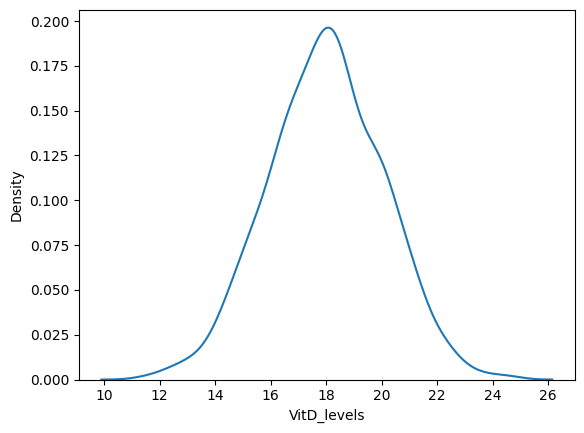

In [91]:
# VitD_levels 
# (1) historgram with a kde
sns.kdeplot(data = df, x= "VitD_levels");

In [92]:
# VitD_levels Mean filter
# (2) Add a line for the mean (red)
Vitd_mean = df['VitD_levels'].mean()
Vitd_mean

17.986573240652408

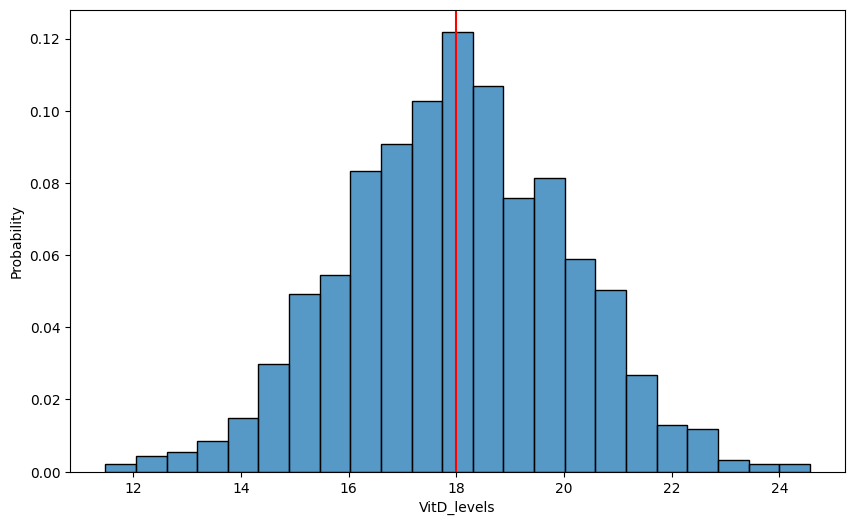

In [93]:
# add line for mean
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['VitD_levels'], ax = ax, stat='probability')
ax.axvline(Vitd_mean, color='red');

In [94]:
# VitD_levels Mean filter
# (3) Add a line for the median (green)
Vitd_median = df['VitD_levels'].median()
Vitd_median

18.02261308

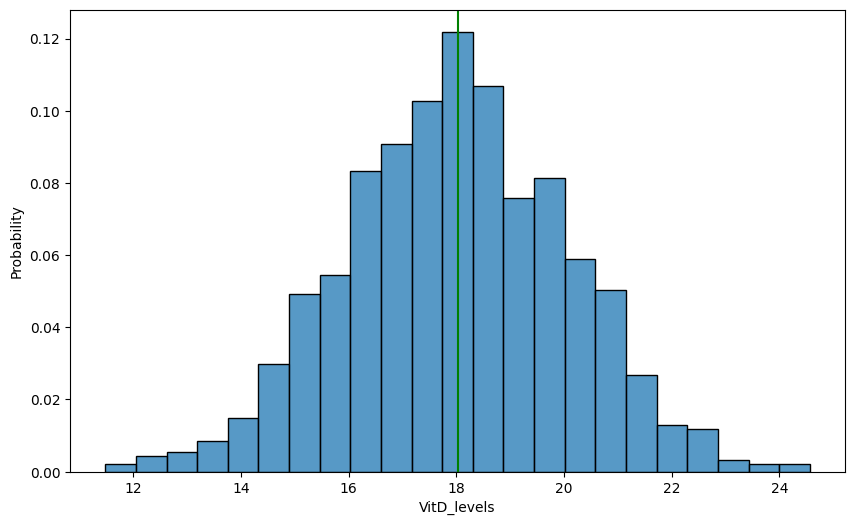

In [95]:
# add green line for median
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['VitD_levels'], ax = ax, stat='probability')
ax.axvline(Vitd_median, color='green');

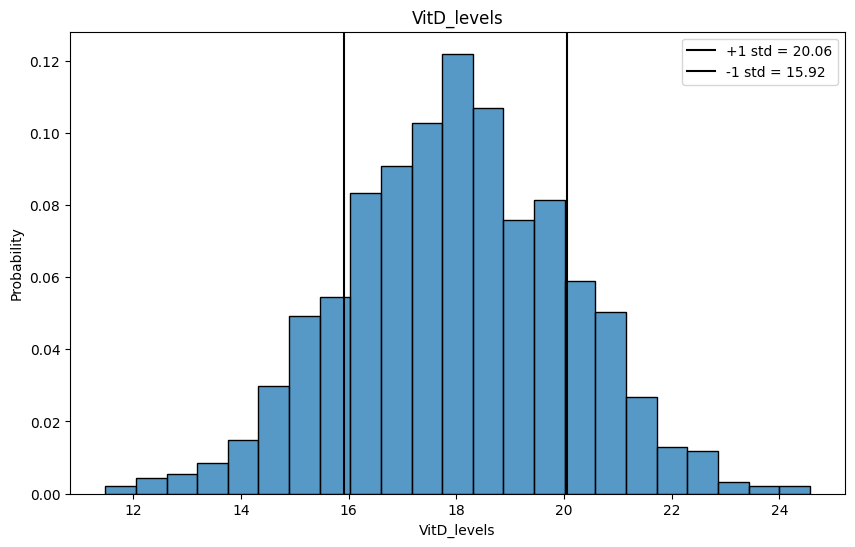

In [96]:
# # VitD_levels 
# (4) Add a line for for +1 std from the mean (black)
# (5) Add a line for the - 1 std from the mean (black)

col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

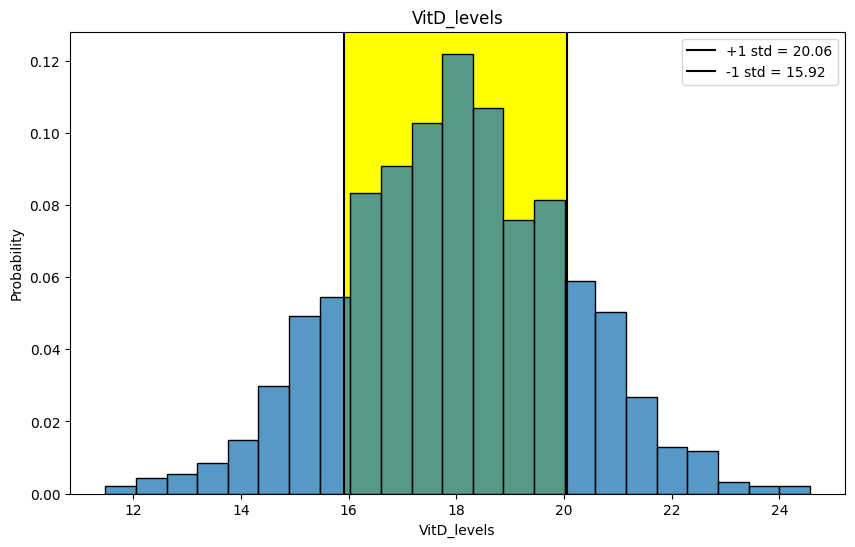

In [97]:
## VitD_levels
# (6)  Highlight the range between +1 and =1 std (yellow)

col = 'VitD_levels'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

**Answer the following questions:*  

1.   Is it Discrete or Continuous?
* This data set seems to be continuous. The data is evenly distributed and has no outliers. 

2. Does it have a skew? If so, which direction (+/-)

* The histograms plot above does not show a skew. Which represent a perfectly symmetrical distribution throughout the data. 


3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) 

* It is Leptokurtic (postive distribution). 

In [98]:
from scipy import stats
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

2.982842529725702

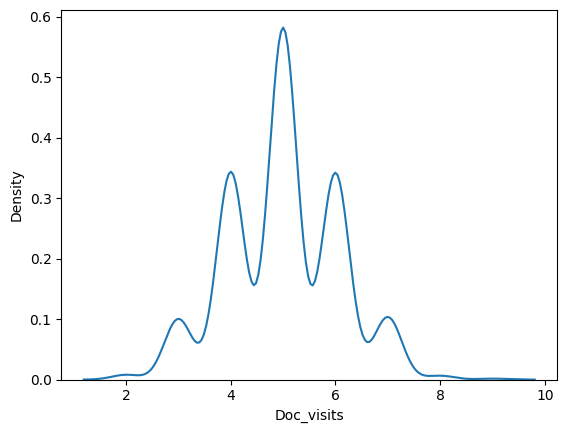

In [99]:
# Doc_visit
# (1) historgram with a kde
sns.kdeplot(data = df, x= "Doc_visits");

In [100]:
# Doc_visit Mean filter
# (2) Add a line for the mean (red)
dv_mean = df['Doc_visits'].mean()
dv_mean

5.00427807486631

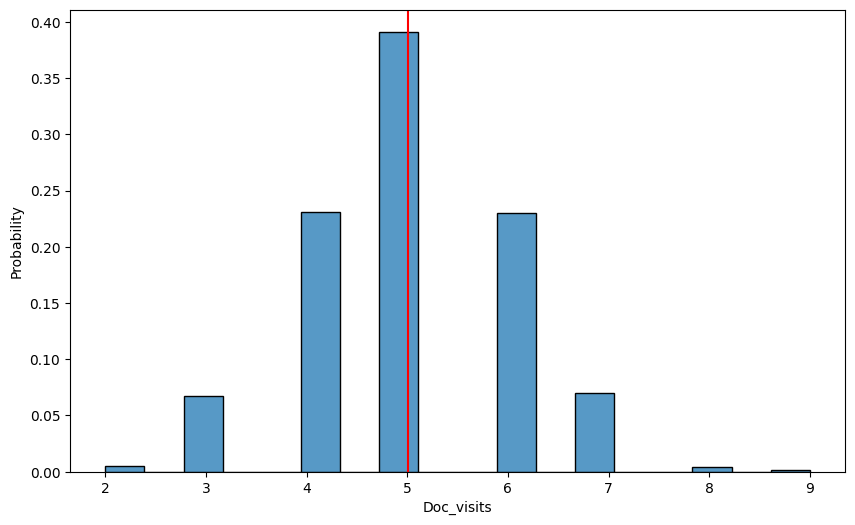

In [101]:
# add line for mean
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Doc_visits'], ax = ax, stat='probability')
ax.axvline(dv_mean, color='red');

In [102]:
# Doc_visit Mean filter
# (3) Add a line for the median (green)
dv_median = df['Doc_visits'].median()
dv_median

5.0

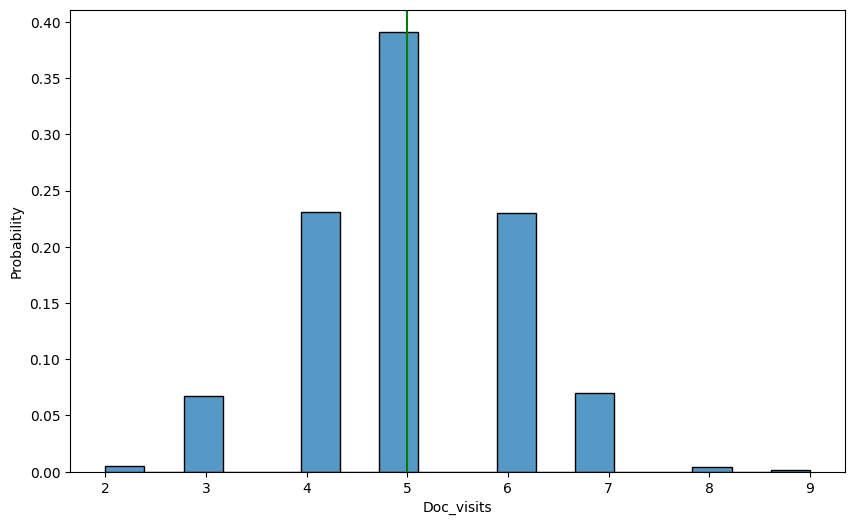

In [103]:
# add green line for median
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['Doc_visits'], ax = ax, stat='probability')
ax.axvline(dv_median, color='green');

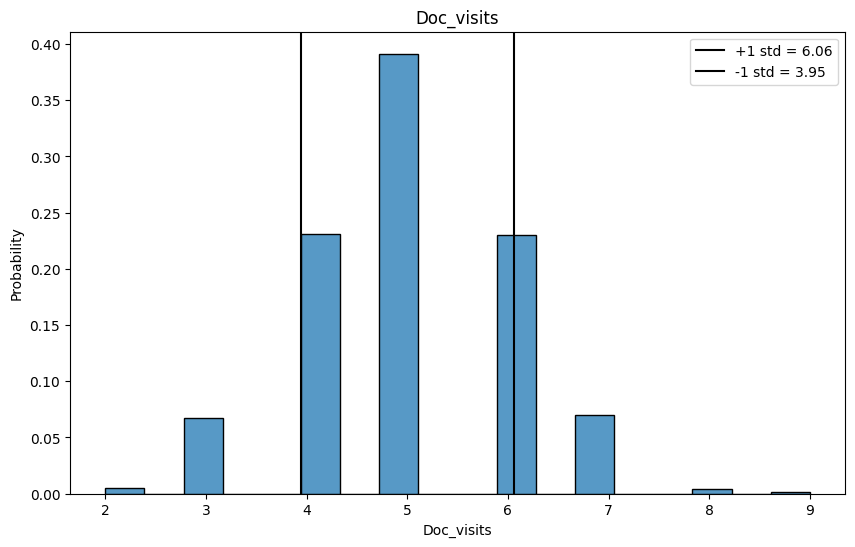

In [104]:
# # Doc_visits 
# (4) Add a line for for +1 std from the mean (black)
# (5) Add a line for the - 1 std from the mean (black)

col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

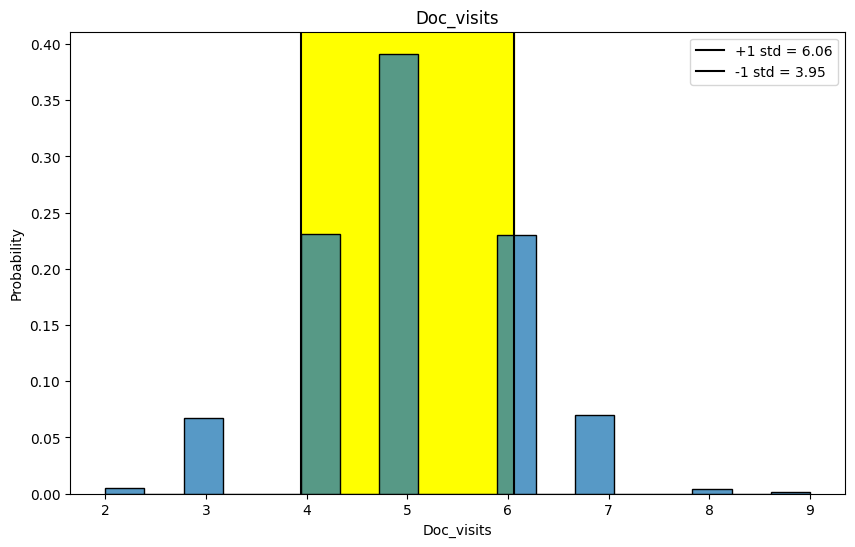

In [105]:
## Doc_visits
# (6)  Highlight the range between +1 and =1 std (yellow)

col = 'Doc_visits'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

**Answer the following questions:**

1.   Is it Discrete or Continuous?
* This data set seems to be discrete. The data is not evenly distributed with data points further away from each other. 

2. Does it have a skew? If so, which direction (+/-)

* The histograms plot above does show a positive skew.

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic) 

* It is Leptokurtic (positive distribution).

In [106]:
from scipy import stats
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.993917662028403

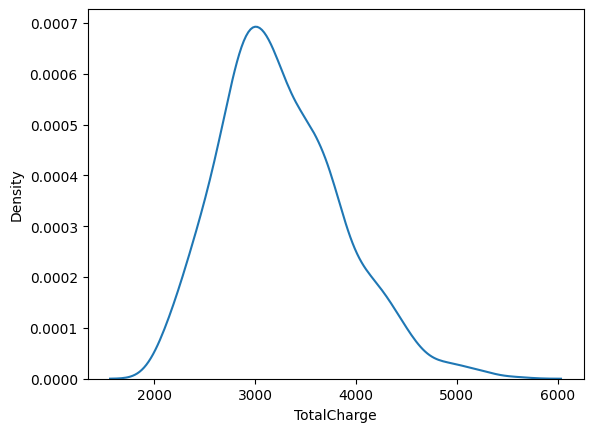

In [107]:
# TotalCharge
# (1) historgram with a kde
sns.kdeplot(data = df, x= "TotalCharge");

In [108]:
# TotalCharge Mean filter
# (2) Add a line for the mean (red)
dv_mean = df['TotalCharge'].mean()
dv_mean

3252.5094875700534

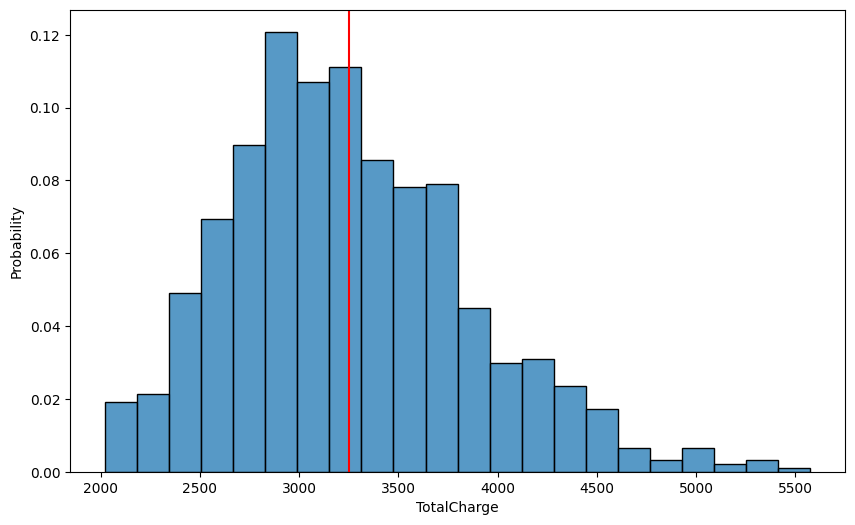

In [109]:
# add line for mean
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['TotalCharge'], ax = ax, stat='probability')
ax.axvline(dv_mean, color='red');

In [110]:
# TotalCharge Mean filter
# (3) Add a line for the median (green)
dv_median = df['TotalCharge'].median()
dv_median

3183.215168

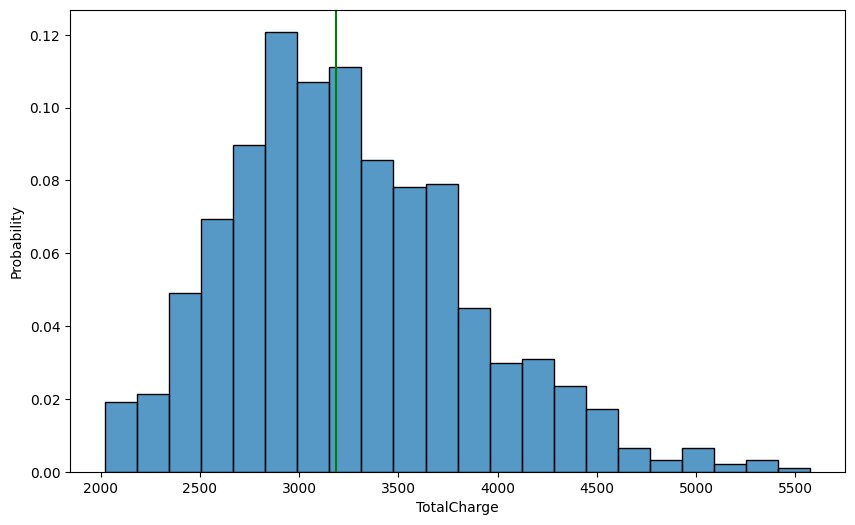

In [111]:
# add green line for median
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(df['TotalCharge'], ax = ax, stat='probability')
ax.axvline(dv_median, color='green');

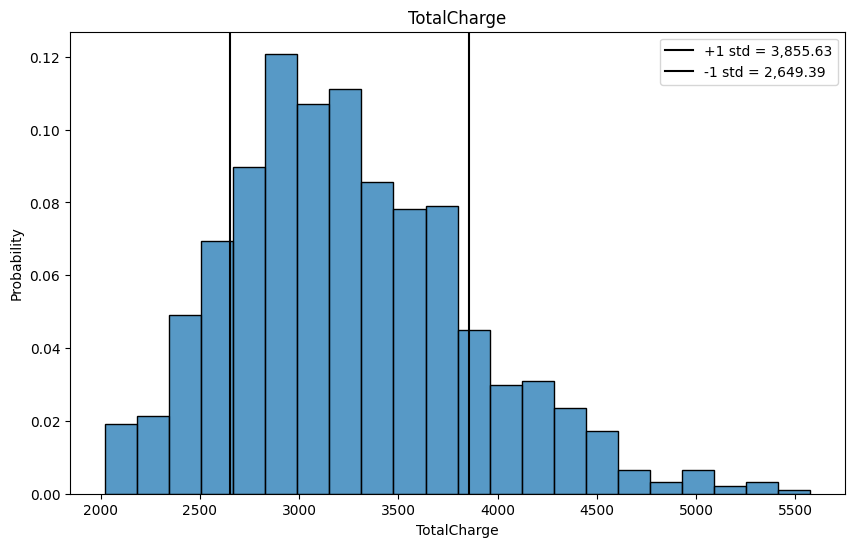

In [112]:
# # TotalCharge
# (4) Add a line for for +1 std from the mean (black)
# (5) Add a line for the - 1 std from the mean (black)

col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.set_title(f'{col}')
ax.legend();

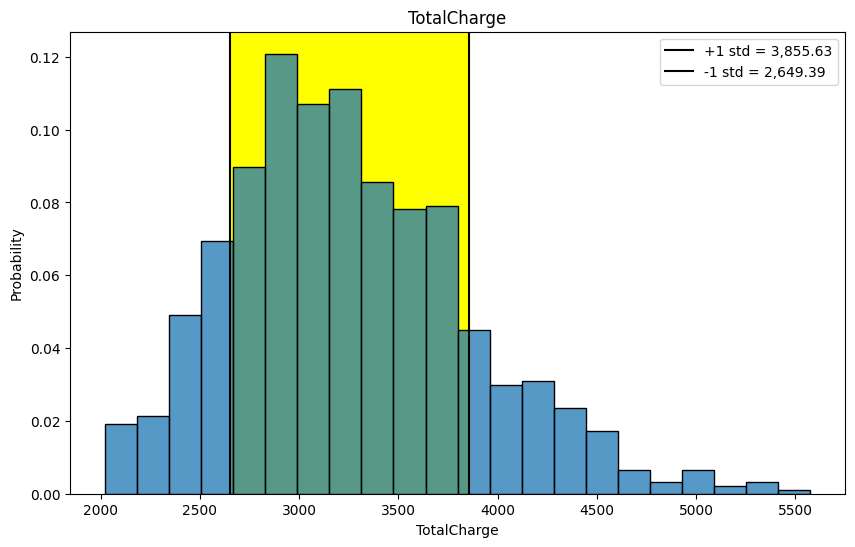

In [113]:
## TotalCharge
# (6)  Highlight the range between +1 and =1 std (yellow)

col = 'TotalCharge'
feature = df[col]
mean = feature.mean()
median = feature.median()
std = feature.std()
plus_one_std = mean + std
minus_one_std = mean - std
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(feature ,ax=ax,stat='probability')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
ax.set_title(f'{col}')
ax.legend();

**Answer the following questions:**

1. Is it Discrete or Continuous?
* A continuous plot 

2. Does it have a skew? If so, which direction (+/-)

* The histograms plot above does show a positive skew.

3. What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)
* It is Platykurtic (negative distribution).

In [114]:
from scipy import stats
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2726982337662545